# Linear Regression (Botswana)

In this code, we use linear regression on the analytical forms of the Green Solow model to find its parameters. We show that the parameters found using linear regression are not consistent, and each analytical equation gives different/ conflicting parameters. 

In [1]:
# #generating the environment, this has to be done the first time this code is run
# using Pkg
# Pkg.generate("regression_Y")

# Pkg.add("ModelingToolkit")
# Pkg.add("OrdinaryDiffEq")
# Pkg.add("LinearAlgebra")
# Pkg.add("Plots")
# Pkg.add("StatsModels")
# Pkg.add("Plots")
# Pkg.add("DataFrames")
# Pkg.add("CSV")
# Pkg.add("GLM")
# Pkg.add("Statistics")
# Pkg.add("Flux")
# Pkg.add("StatsBase")

In [2]:
println(@__DIR__)
using Pkg
Pkg.activate(string(@__DIR__, "/regression_Y/"))
Pkg.status()

/home/ziyu/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Model -1 Analytical Solution Regression


 Activating environment at `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Model -1 Analytical Solution Regression/regression_Y/Project.toml`


Project regression_Y v0.1.0
Status `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Model -1 Analytical Solution Regression/regression_Y/Project.toml`
  [336ed68f] CSV v0.8.4
  [a93c6f00] DataFrames v0.22.5
  [587475ba] Flux v0.11.1
  [38e38edf] GLM v1.4.0
  [961ee093] ModelingToolkit v5.10.1
  [1dea7af3] OrdinaryDiffEq v5.51.1
  [91a5bcdd] Plots v1.6.12
  [2913bbd2] StatsBase v0.33.3
  [3eaba693] StatsModels v0.6.21
  [37e2e46d] LinearAlgebra 
  [10745b16] Statistics 


In [3]:
using ModelingToolkit
using OrdinaryDiffEq
using LinearAlgebra
using Statistics
using Flux
using StatsBase
using DataFrames
# using Plots

# Importing data

In [4]:
using CSV
raw_data = CSV.read(string(@__DIR__,"/compileddf.csv"),normalizenames = true, DataFrame)

,Year,Albania_et,Albania_yt,Albania_Popt,Albania_nt,Albania_Ktotal,Albania_kt
,Int64,Float64?,Float64?,Float64,Float64?,Float64?,Float64?
1,1959,missing,missing,1.57133e6,missing,missing,missing
2,1960,1.25819,0.001451,1.62311e6,0.0329562,missing,missing
3,1961,1.37419,0.001463,1.67664e6,0.0329743,missing,missing
4,1962,1.43996,0.001511,1.72814e6,0.0307175,missing,missing
5,1963,1.18168,0.001563,1.77972e6,0.029846,missing,missing
6,1964,1.11174,0.001616,1.83228e6,0.0295379,missing,missing
7,1965,1.1661,0.001675,1.88365e6,0.028035,missing,missing
8,1966,1.33306,0.001738,1.93296e6,0.0261784,missing,missing
9,1967,1.36375,0.001804,1.98406e6,0.0264345,missing,missing


In [5]:
Botswana_raw = raw_data[:, ["Botswana_kt", "Botswana_et", "Botswana_yt", "Botswana_nt"]]
delete!(Botswana_raw, 1:15)
Botswana_raw[!,:t] = 1:35
Botswana_y_reg = Botswana_raw[:,[1,3,2,5]]
DataFrames.rename!(Botswana_y_reg, [:k, :y, :e, :t])
Botswana_y_reg = Botswana_y_reg[2:end,:]

Botswana_y_reg[!, :yty0] = Botswana_y_reg[!, :y]/Botswana_y_reg[!, :y][1]
Botswana_y_reg[!, :lgyty0] = log.(Botswana_y_reg[!, :yty0])
Botswana_y_reg[!, :ktk0] = Botswana_y_reg[!, :k]/Botswana_y_reg[!, :k][1]
Botswana_y_reg[!, :lgktk0] = log.(Botswana_y_reg[!, :ktk0])
Botswana_raw

,Botswana_kt,Botswana_et,Botswana_yt,Botswana_nt,t
,Float64?,Float64?,Float64?,Float64?,Int64
1,0.00394345,0.123138,0.0013,0.0446184,1
2,0.00408493,0.252264,0.001223,0.0488591,2
3,0.00404858,0.77152,0.001381,0.0520614,3
4,0.00402169,0.975694,0.001358,0.0542297,4
5,0.00407305,0.99993,0.001537,0.0521772,5
6,0.00424262,1.08941,0.001613,0.0490789,6
7,0.00457454,1.09863,0.001765,0.0439067,7
8,0.00477105,1.08385,0.001858,0.0377156,8
9,0.00494978,1.14252,0.001921,0.0387538,9


In [6]:
#useful for calculations later
println(mean(Botswana_raw[!,"Botswana_nt"]))

0.03228734200605755


## Parameters for the equation for y(t)

Start by regressing the equation for $y(t)$. To regress the following equation, the analytical solution of the Green Solow Model equation:

$\frac{y(t)}{y(0)} = \frac{k(t)^\alpha}{k(0)^\alpha} \times e^{g_B \times t} = \left(\frac{k(t)}{k(0)}\right)^\alpha \times e^{g_B \times t}$

Can take the log of both sides to get:

$\log\left(\frac{y(t)}{y(0)}\right) = \alpha \log\left(\frac{k(t)}{k(0)}\right) + g_B\times t$

In [7]:
using GLM

#regression of Botswana y data
ols_y_Botswana = lm(@formula(lgyty0 ~ lgktk0 + t), Botswana_y_reg)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

lgyty0 ~ 1 + lgktk0 + t

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.185088   0.0362612    -5.10    <1e-4   -0.259043   -0.111133
lgktk0       -0.651249   0.0647908   -10.05    <1e-10  -0.78339    -0.519107
t             0.0866218  0.00476762   18.17    <1e-17   0.0768982   0.0963454
─────────────────────────────────────────────────────────────────────────────

Note that the value of $\alpha$ can be found through this regression, via the coefficient for $log\frac{k(t)}{k(0)}$

In [8]:
#returns the coefficients, which are the values of $\alpha$ and $g_B$

Botswana_intercept = coef(ols_y_Botswana)[1]
Botswana_alpha = coef(ols_y_Botswana)[2]
Botswana_gB = coef(ols_y_Botswana)[3]

println("alpha is ", Botswana_alpha)
println("gB is ", Botswana_gB)

alpha is -0.6512485258602105
gB is 0.08662180641283503


## Parameters for the equation for e(t)

Regressing the equation for $e(t)$. To regress the following equation, the analytical solution of the Green Solow Model equation:

\begin{gather}
    \frac{e(t)}{e(0)} 
    = \left( \frac{k(t)}{k(0)}\right)^\alpha \times e^{(g_B -g_A) \times t}
\end{gather}
    
Can take the log of both sides to get:

$\log\left(\frac{e(t)}{e(0)}\right) = \alpha \log\left(\frac{k(t)}{k(0)}\right) + (g_B-g_A)\times t$

In [9]:
Botswana_e_reg = Botswana_raw[:,[1,3,2,5]]
DataFrames.rename!(Botswana_e_reg, [:k, :y, :e, :t])
Botswana_e_reg = Botswana_e_reg[2:end,:]

Botswana_e_reg[!, :ete0] = Botswana_e_reg[!, :e]/Botswana_y_reg[!, :e][1]
Botswana_e_reg[!, :lgete0] = log.(Botswana_e_reg[!, :ete0])
Botswana_e_reg[!, :ktk0] = Botswana_e_reg[!, :k]/Botswana_e_reg[!, :k][1]
Botswana_e_reg[!, :lgktk0] = log.(Botswana_e_reg[!, :ktk0])
# print(Botswana_y_reg)

ols_e_Botswana = lm(@formula(lgete0 ~ lgktk0 + t), Botswana_e_reg)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

lgete0 ~ 1 + lgktk0 + t

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)   0.751093    0.180663    4.16    0.0002   0.38263    1.11956
lgktk0       -0.55891     0.322804   -1.73    0.0933  -1.21727    0.0994533
t             0.0814058   0.0237535   3.43    0.0017   0.0329602  0.129851
───────────────────────────────────────────────────────────────────────────

Upon observation, we can see that the values for $\alpha$ already differ among these two regessions.

## Parameters for the equation for k(t)

\begin{equation}
    k(t) = (\frac{\frac{(1-\alpha)\times s\times y(0)}{k(0)^\alpha} \times \frac{e^{(1-\alpha)\times (\delta+n+g_B)\times t + g_B \times t}}{(1-\alpha)\times (\delta+n+g_B) + g_B } +C}{e^{(1-\alpha)\times (\delta +n+g_B)\times t }})^\frac{1}{1-\alpha}
\end{equation}
Where:
\begin{equation}
    C = k(0)^{1-\alpha} - \frac{(1-\alpha)\times s\times y(0)}{{k(0)^\alpha}\times((1-\alpha)\times (\delta+n+g_B) + g_B )}
\end{equation}

We can simplify the equation to: 
\begin{equation}
    k(t) ^ {(1-\alpha)}= \frac{(1-\alpha)\times s\times y(0)}{k(0)^\alpha \times ((1-\alpha)\times (\delta+n+g_B) + g_B )}  \times e^{g_B \times t} +C\times {e^{(\alpha-1)\times (\delta +n+g_B)\times t }}
\end{equation}

Which is equivalent to:
\begin{equation}
    k(t) ^ {(1-\alpha)}= \frac{(1-\alpha)\times s\times y(0)}{k(0)^\alpha \times ((1-\alpha)\times (\delta+n+g_B) + g_B )}  \times e^{g_B \times t} +(k(0)^{1-\alpha} - \frac{(1-\alpha)\times s\times y(0)}{{k(0)^\alpha}\times((1-\alpha)\times (\delta+n+g_B) + g_B )})\times {e^{(\alpha-1)\times (\delta +n+g_B)\times t }}
\end{equation}


Finding of coefficients based on:
https://math.stackexchange.com/questions/2249200/exponential-regression-with-two-terms-and-constraints
https://scikit-guess.readthedocs.io/en/latest/_downloads/4cd313a50f7e08ab81758ce0bd661bc3/Regressions-et-equations-integrales.pdf

In [10]:
function regression_system(dataframe)
regression_system_matrix = zeros(5,5)

regression_system_matrix[1,1] = sum(dataframe[:, :SSk].^2)
regression_system_matrix[1,2] = sum(dataframe[:, :SSk].*dataframe[:, :Sk])
regression_system_matrix[1,3] = sum(dataframe[:, :SSk].*dataframe[:, :t].^2)
regression_system_matrix[1,4] = sum(dataframe[:, :SSk].*dataframe[:, :t])
regression_system_matrix[1,5] = sum(dataframe[:, :SSk])

regression_system_matrix[2,1] = regression_system_matrix[1,2]
regression_system_matrix[2,2] = sum(dataframe[:, :Sk].^2)
regression_system_matrix[2,3] = sum(dataframe[:, :Sk].*dataframe[:, :t].^2)
regression_system_matrix[2,4] = sum(dataframe[:, :Sk].*dataframe[:, :t])
regression_system_matrix[2,5] = sum(dataframe[:, :Sk])

regression_system_matrix[3,1] = sum(dataframe[:, :SSk].*dataframe[:, :t].^2)
regression_system_matrix[3,2] = sum(dataframe[:, :Sk].*dataframe[:, :t].^2)
regression_system_matrix[3,3] = sum(dataframe[:, :t].^4)
regression_system_matrix[3,4] = sum(dataframe[:, :t].^3)
regression_system_matrix[3,5] = sum(dataframe[:, :t].^2)

regression_system_matrix[4,1] = sum(dataframe[:, :SSk].*dataframe[:, :t])
regression_system_matrix[4,2] = sum(dataframe[:, :Sk].*dataframe[:, :t])
regression_system_matrix[4,3] = sum(dataframe[:, :t].^3)
regression_system_matrix[4,4] = sum(dataframe[:, :t].^2)
regression_system_matrix[4,5] = sum(dataframe[:, :t].^1)

regression_system_matrix[5,1] = sum(dataframe[:, :SSk])
regression_system_matrix[5,2] = sum(dataframe[:, :Sk])
regression_system_matrix[5,3] = sum(dataframe[:, :t].^2)
regression_system_matrix[5,4] = sum(dataframe[:, :t].^1)
regression_system_matrix[5,5] = length(dataframe[:, :t])
# print(regression_system_matrix)

regression_system_vector = zeros(5,1)
regression_system_vector[1] = sum(dataframe[:, :SSk].*dataframe[:, :kalpha])
regression_system_vector[2] = sum(dataframe[:, :Sk].*dataframe[:, :kalpha])
regression_system_vector[3] = sum(dataframe[:, :kalpha].*dataframe[:, :t].^2)
regression_system_vector[4] = sum(dataframe[:, :kalpha].*dataframe[:, :t].^1)
regression_system_vector[5] = sum(dataframe[:, :kalpha])
# print(regression_system_vector)

ABCDE = inv(regression_system_matrix) * regression_system_vector
# print(ABCDE)
A = ABCDE[1]
B = ABCDE[2]
    
return A, B
end

regression_system (generic function with 1 method)

In [11]:
function unrelated_coefficients(dataframe,p ,q)
unrelated_coefficient_matrix = zeros(3,3)

unrelated_coefficient_matrix[1,1] = length(dataframe[:, :t])
unrelated_coefficient_matrix[1,2] = sum(exp.(p.*dataframe[:, :t]))
unrelated_coefficient_matrix[1,3] = sum(exp.(q.*dataframe[:, :t]))

unrelated_coefficient_matrix[2,1] = sum(exp.(p.*dataframe[:, :t]))
unrelated_coefficient_matrix[2,2] = sum(exp.(2*p.*dataframe[:, :t]))
unrelated_coefficient_matrix[2,3] = sum(exp.((p+q).*dataframe[:, :t]))

unrelated_coefficient_matrix[3,1] = sum(exp.(q*dataframe[:, :t]))
unrelated_coefficient_matrix[3,2] = sum(exp.((p+q).*dataframe[:, :t]))
unrelated_coefficient_matrix[3,3] = sum(exp.(2*q.*dataframe[:, :t]))
# print(unrelated_coefficient_matrix)

unrelated_coefficient_vector = zeros(3,1)
unrelated_coefficient_vector[1] = sum(dataframe[:, :kalpha])
unrelated_coefficient_vector[2] = sum(dataframe[:, :kalpha].*exp.(p.*dataframe[:, :t]))
unrelated_coefficient_vector[3] = sum(dataframe[:, :kalpha].*exp.(q.*dataframe[:, :t]))
# print(unrelated_coefficient_vector)

abc = inv(unrelated_coefficient_matrix) * unrelated_coefficient_vector
a,b,c = abc
return a,b,c
end

unrelated_coefficients (generic function with 1 method)

Proceed with regression for k

We solve for a,b,c,p,q to get the regression equation: 

\begin{equation}
    y = k(t) ^{1-\alpha} = a +b\times e ^{p \times t} +c \times e ^{q \times t} 
\end{equation}

Therefore we solve for k(t):
$k(t) = y^\frac{1}{1-\alpha}$


## Parameters for the equation for k(t)

In [12]:
Botswana_k_reg = Botswana_raw[:,[1,5]]
DataFrames.rename!(Botswana_k_reg, [:k, :t])
Botswana_k_reg = Botswana_k_reg[2:end,:]

Botswana_k_reg[!, :kalpha] = Botswana_k_reg[!,:k].^(1-Botswana_alpha) #already sorted in increasing order of k and t

Botswana_k_reg[!, :Sk] = convert(UnitRange{Float64},0:(size(Botswana_k_reg[!,:k])[1]-1))
Botswana_k_reg[!, :SSk] = convert(UnitRange{Float64},0:(size(Botswana_k_reg[!,:k])[1]-1))

for i in 1:(size(Botswana_k_reg[!,:k])[1]-1)
    Botswana_k_reg[i+1, :Sk] = Botswana_k_reg[i, :Sk] + 0.5*(Botswana_k_reg[i+1, :kalpha]+Botswana_k_reg[i, :kalpha])*(Botswana_k_reg[i+1, :t]-Botswana_k_reg[i, :t])
    Botswana_k_reg[i+1, :SSk] = Botswana_k_reg[i, :SSk] + 0.5*(Botswana_k_reg[i+1, :Sk]+Botswana_k_reg[i, :Sk])*(Botswana_k_reg[i+1, :t]-Botswana_k_reg[i, :t])
end
# last(Botswana_k_reg,5)

Botswana_A,Botswana_B = regression_system(Botswana_k_reg)

Botswana_p = 0.5(Botswana_B+sqrt(Botswana_B^2+4*Botswana_A))
Botswana_q = 0.5(Botswana_B-sqrt(Botswana_B^2+4*Botswana_A))
print(" p = ", Botswana_p,"\n q = ",Botswana_q)

Botswana_a,Botswana_b,Botswana_c = unrelated_coefficients(Botswana_k_reg, Botswana_p, Botswana_q)
print("\n a = ", Botswana_a,"\n b = ",Botswana_b, "\n c = ",Botswana_c)

#solving for predicted values of k
Botswana_k_reg[!,:k_pred] = (Botswana_a .+ Botswana_b .* exp.(Botswana_p.*Botswana_k_reg[!,:t]) .+ Botswana_c .* exp.(Botswana_q.*Botswana_k_reg[!,:t])).^(1/(1-Botswana_alpha))
Botswana_k_reg

 p = 0.1803856004081679
 q = 0.06811716963609693
 a = 2.219184453549694e-5
 b = 7.323800151796328e-6
 c = 4.7500769184909135e-5

,k,t,kalpha,Sk,SSk,k_pred
,Float64?,Int64,Float64,Float64,Float64,Float64
1,0.00408493,2,0.000113624,0.0,0.0,0.00347823
2,0.00404858,3,0.00011196,0.000112792,5.6396e-5,0.00361935
3,0.00402169,4,0.000110735,0.000224139,0.000224862,0.0037726
4,0.00407305,5,0.000113079,0.000336046,0.000504954,0.00393934
5,0.00424262,6,0.000120958,0.000453065,0.000899509,0.00412109
6,0.00457454,7,0.000136978,0.000582033,0.00141706,0.00431958
7,0.00477105,8,0.00014683,0.000723937,0.00207004,0.00453673
8,0.00494978,9,0.000156023,0.000875363,0.00286969,0.00477474
9,0.00482787,10,0.000149729,0.00102824,0.00382149,0.00503608


The simplest value to compare is to $g_B$ from the regression of $y(t)$, which should correspond to $p$ in the regression of $k(t)$. These values do not match.

# Fitting of values using linear regression

Using each linear regression to regenerate the values of k(t), y(t) and e(t) from initial conditions, we find that the regressions actually fit the data well despite the regression coefficients/ Green Solow model parameters being inconsistent between equations. This suggests that it may be difficult to fit all three equations with constant and consistent parameters. 

In [13]:
Botswana_pred = Botswana_k_reg[:,[1,2]]
DataFrames.rename!(Botswana_pred, [:k,:t])
Botswana_pred[:,:k_pred] = Botswana_k_reg[!,:k_pred]



Botswana_pred[!,:y_pred] = Botswana_y_reg[1,:y].*exp.(coef(ols_y_Botswana)[2]*log.(Botswana_k_reg[!,:k_pred]./Botswana_k_reg[1,:k_pred]) 
            .+ coef(ols_y_Botswana)[1]
            .+ coef(ols_y_Botswana)[3].*Botswana_k_reg[!,:t])

Botswana_pred[!,:e_pred] = Botswana_e_reg[1,:e].*exp.(coef(ols_e_Botswana)[2]*log.(Botswana_k_reg[!,:k_pred]./Botswana_k_reg[1,:k_pred]) 
            .+ coef(ols_e_Botswana)[1]
            .+ coef(ols_e_Botswana)[3].*Botswana_k_reg[!,:t])
Botswana_pred[!,:y_actual] = Botswana_y_reg[!,:y]
Botswana_pred[!,:e_actual] = Botswana_e_reg[!,:e]
Botswana_pred


,k,t,k_pred,y_pred,e_pred,y_actual,e_actual
,Float64?,Int64,Float64,Float64,Float64,Float64?,Float64?
1,0.00408493,2,0.00347823,0.0012086,0.629157,0.001223,0.252264
2,0.00404858,3,0.00361935,0.00128426,0.667513,0.001381,0.77152
3,0.00402169,4,0.0037726,0.00136315,0.707534,0.001358,0.975694
4,0.00407305,5,0.00393934,0.00144521,0.74921,0.001537,0.99993
5,0.00424262,6,0.00412109,0.00153036,0.792518,0.001613,1.08941
6,0.00457454,7,0.00431958,0.00161848,0.837424,0.001765,1.09863
7,0.00477105,8,0.00453673,0.00170944,0.883881,0.001858,1.08385
8,0.00494978,9,0.00477474,0.00180307,0.931829,0.001921,1.14252
9,0.00482787,10,0.00503608,0.00189915,0.981196,0.002144,1.03443


In [14]:
pred = Array(Botswana_pred[!, [:k_pred, :y_pred, :e_pred]])
kdata = Botswana_pred[!, :k]
ydata = Botswana_pred[!, :y_actual]
edata = Botswana_pred[!, :e_actual]
Botswana_k_pred = identity.(Botswana_pred[!, :k_pred])
Botswana_y_pred = identity.(Botswana_pred[!, :y_pred])
Botswana_e_pred = identity.(Botswana_pred[!, :e_pred])

34-element Array{Float64,1}:
 0.6291565333192833
 0.667512851125945
 0.7075342173803375
 0.7492100461252883
 0.7925181444917635
 0.8374240803851268
 0.8838808157099484
 0.9318286654130445
 0.9811956344216893
 1.0318981703574344
 1.0838423498252345
 1.1369254910273006
 1.1910381572112592
 ⋮
 1.764854150791789
 1.823592452602984
 1.8823765794593053
 1.9411986851174328
 2.0000628994854885
 2.058984220764798
 2.117987277222114
 2.1771050270471943
 2.236377455034811
 2.295850313452482
 2.3555739426973594
 2.415602196187065

In [15]:
#checking the implementation of MSE
# println("(Botswana Mean Squared Errors) kt: ", Flux.mse(Botswana_k_reg[!, :k_pred], Botswana_k_reg[!, :k]), 
#     " yt: ", Flux.mse(Botswana_y_pred, Botswana_y_reg[!, :y]), 
#     " et: ", Flux.mse(Botswana_e_pred, Botswana_e_reg[!, :e]))
println("(Botswana Mean Squared Errors) kt: ", (sqL2dist(Botswana_k_reg[!, :k_pred], identity.(Botswana_k_reg[!, :k]))/length(Botswana_k_reg[!, :k])), 
    " yt: ", (sqL2dist(Botswana_y_pred, identity.(Botswana_y_reg[!, :y]))/length(Botswana_y_reg[!, :y])), 
    " et: ", (sqL2dist(Botswana_e_pred, identity.(Botswana_e_reg[!, :e]))/length(Botswana_e_reg[!, :e])))
println("(Botswana Root Mean Squared Errors) kt: ", (L2dist(Botswana_k_reg[!, :k_pred], identity.(Botswana_k_reg[!, :k]))/length(Botswana_k_reg[!, :k])), 
    " yt: ", (L2dist(Botswana_y_pred, identity.(Botswana_y_reg[!, :y]))/length(Botswana_y_reg[!, :y])), 
    " et: ", (L2dist(Botswana_e_pred, identity.(Botswana_e_reg[!, :e]))/length(Botswana_e_reg[!, :e])))
#checking the implementation of MAE
# println("(Botswana Mean Absolute Errors) kt: ", Flux.mae(Botswana_k_reg[!, :k_pred], Botswana_k_reg[!, :k]), 
#     " yt: ", Flux.mae(Botswana_y_pred, Botswana_y_reg[!, :y]), 
#     " et: ", Flux.mae(Botswana_e_pred, Botswana_e_reg[!, :e]))
println("(Botswana Mean Absolute Errors) kt: ", 
    L1dist(convert(Array{Float64},Botswana_k_reg[!, :k_pred]),identity.(Botswana_k_reg[!, :k]))/length(Botswana_k_reg[!, :k]), 
    " yt: ", L1dist(convert(Array{Float64},Botswana_y_pred),identity.(Botswana_y_reg[!, :y]))/length(Botswana_y_reg[!, :y]), 
    " et: ", L1dist(convert(Array{Float64},Botswana_e_pred),identity.(Botswana_e_reg[!, :e]))/length(Botswana_e_reg[!, :e]))


function r2_impl(data,pred)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
return r2  
end
#checking the implementation of R2
# println("(Botswana R2 Correlation Coefficient) yt: ", r2(ols_y_Botswana),
#     " et: ", r2(ols_e_Botswana))
# println("(Botswana R2 Correlation Coefficient) yt: ", r2_impl(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana)),
#     " et: ", r2_impl(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana)))
println("(Botswana R2 Correlation Coefficient) kt: ", r2_impl(Botswana_k_reg[!, :k], Botswana_k_reg[!, :k_pred]), 
    " yt: ", r2_impl(Botswana_y_reg[!, :y], Botswana_y_pred), 
    " et: ", r2_impl(Botswana_e_reg[!, :e], Botswana_e_pred))

function Ar2_impl(data,pred, p)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
n = size(data)[1]
ar2 = 1 - abs((1 - r2)*(n-1)/(n-p-1))
return ar2  
end

#checking the implementation of adjusted R2
# println("(Botswana Adjusted R2) yt: ", adjr2(ols_y_Botswana),
#     " et: ", adjr2(ols_e_Botswana))
# println("(Botswana Adjusted R2) yt: ", Ar2_impl(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),2),
#     " et: ", Ar2_impl(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),2))
# 2 parameters are coeff of lge, coeff of t, y intercept is excluded
# for k, there are 4 parameters excluding intercept
println("(Botswana Adjusted R2) kt: ", Ar2_impl(Botswana_k_reg[!, :k], Botswana_k_reg[!, :k_pred], 4), 
    " yt: ", Ar2_impl(Botswana_y_reg[!, :y], Botswana_y_pred, 2), 
    " et: ", Ar2_impl(Botswana_e_reg[!, :e], Botswana_e_pred, 2))

println("(Botswana Mean Percentage Error) kt: ", mean((Botswana_k_reg[!, :k].- Botswana_k_reg[!, :k_pred])./Botswana_k_reg[!, :k])*100,
    " yt: ", mean((Botswana_y_reg[!, :y].- Botswana_y_pred)./Botswana_y_reg[!, :y])*100,
    " et: ", mean((Botswana_e_reg[!, :e].- Botswana_e_pred)./Botswana_e_reg[!, :e])*100)

println("(Botswana Mean Absolute Percentage Error) kt: ", mean(abs.((Botswana_k_reg[!, :k].- Botswana_k_reg[!, :k_pred])./Botswana_k_reg[!, :k]))*100,
    " yt: ", mean(abs.((Botswana_y_reg[!, :y].- Botswana_y_pred)./Botswana_y_reg[!, :y]))*100,
    " et: ", mean(abs.((Botswana_e_reg[!, :e].- Botswana_e_pred)./Botswana_e_reg[!, :e]))*100)

println("(Botswana Mean Arctangent Absolute Percentage Error) kt: ", mean(atan.(abs.((Botswana_k_reg[!, :k].- Botswana_k_reg[!, :k_pred])./Botswana_k_reg[!, :k])))*100,
    " yt: ", mean(atan.(abs.((Botswana_y_reg[!, :y].- Botswana_y_pred)./Botswana_y_reg[!, :y])))*100,
    " et: ", mean(atan.(abs.((Botswana_e_reg[!, :e].- Botswana_e_pred)./Botswana_e_reg[!, :e])))*100)

println("(Botswana Mean Bias Error) kt: ", mean(Botswana_k_reg[!, :k].- Botswana_k_reg[!, :k_pred]),
    " yt: ", mean(Botswana_y_reg[!, :y].- Botswana_y_pred),
    " et: ", mean(Botswana_e_reg[!, :e].- Botswana_e_pred))

function loglikelihood_calc(data,pred)
rss = sum((data .-pred).^2)
n = length(pred)
return -n/2*(log(2pi*rss/n)+1)
end
# implementation from julia: https://github.com/JuliaStats/GLM.jl/blob/950579166c52ff1cbbeab75cbc23235b30640802/src/lm.jl

#checking implementation for loglikelihood
# println("(Botswana Loglikelihood) yt: ", loglikelihood(ols_y_Botswana),
#     " et: ", loglikelihood(ols_e_Botswana))
# println("(Botswana Loglikelihood) yt: ", loglikelihood_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana)),
#     " et: ", loglikelihood_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana)))
println("(Botswana Loglikelihood) kt: ", loglikelihood_calc(Botswana_k_reg[!, :k], Botswana_k_reg[!, :k_pred]),
    " yt: ", loglikelihood_calc(Botswana_y_reg[!, :y], Botswana_y_pred),
    " et: ", loglikelihood_calc(Botswana_e_reg[!, :e], Botswana_e_pred))

function aic_calc(data, pred, params)
    L = loglikelihood_calc(data,pred)
    return 2*params-2*L
end

#checking implementation for aic
# println("(Botswana Aikaike Information Criterion) yt: ", aic(ols_y_Botswana),
#     " et: ", aic(ols_e_Botswana))
# println("(Botswana Aikaike Information Criterion) yt: ", aic_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),4),
#     " et: ", aic_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(Botswana Aikaike Information Criterion) kt: ", aic_calc(Botswana_k_reg[!, :k], Botswana_k_reg[!, :k_pred], 6),
    " yt: ", aic_calc(Botswana_y_reg[!, :y], Botswana_y_pred, 4),
    " et: ", aic_calc(Botswana_e_reg[!, :e], Botswana_e_pred, 4))

function aicc_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + 2*params + 2*params*(params+1)/(n-params-1)
end

# checking implementation for aicc
# println("(Botswana Corrected AIC) yt: ", aicc(ols_y_Botswana),
#     " et: ", aicc(ols_e_Botswana))
# println("(Botswana Corrected AIC) yt: ", aicc_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),4),
#     " et: ", aicc_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(Botswana Corrected AIC) kt: ", aicc_calc(Botswana_k_reg[!, :k], Botswana_k_reg[!, :k_pred], 6),
    " yt: ", aicc_calc(Botswana_y_reg[!, :y], Botswana_y_pred, 4),
    " et: ", aicc_calc(Botswana_e_reg[!, :e], Botswana_e_pred, 4))

function bic_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + params*log(n)
end

# checking implementation for bic_calc
# println("(Botswana Corrected BIC) yt: ", bic(ols_y_Botswana),
#     " et: ", bic(ols_e_Botswana))
# println("(Botswana Corrected BIC) yt: ", bic_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),4),
#     " et: ", bic_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(Botswana BIC) kt: ", bic_calc(Botswana_k_reg[!, :k], Botswana_k_reg[!, :k_pred], 6),
    " yt: ", bic_calc(Botswana_y_reg[!, :y], Botswana_y_pred, 4),
    " et: ", bic_calc(Botswana_e_reg[!, :e], Botswana_e_pred, 4))

(Botswana Mean Squared Errors) kt: 1.8353243246405207e-7 yt: 1.334718112850297e-7 et: 0.09664974444185301
(Botswana Root Mean Squared Errors) kt: 7.347116930831402e-5 yt: 6.265494001579784e-5 et: 0.05331640969164598
(Botswana Mean Absolute Errors) kt: 0.0003581956547092669 yt: 0.000319080997829496 et: 0.23805821661076648
(Botswana R2 Correlation Coefficient) kt: 0.998029611575365 yt: 0.8874003363994728 et: 0.7366721156280416
(Botswana Adjusted R2) kt: 0.9977578338616222 yt: 0.8801358419736324 et: 0.7196832198621088
(Botswana Mean Percentage Error) kt: -0.31342874337945087 yt: 9.847689574383578 et: 5.508468521008606
(Botswana Mean Absolute Percentage Error) kt: 5.098749601865523 yt: 9.870001593624838 et: 18.31824286508371
(Botswana Mean Arctangent Absolute Percentage Error) kt: 5.076341761766376 yt: 9.813879491797739 et: 16.566547053527106
(Botswana Mean Bias Error) kt: -6.61183866914205e-6 yt: 0.00031877800060819977 et: 0.16692422034373902
(Botswana Loglikelihood) kt: 215.4409553747697

In [16]:
using LaTeXStrings
using Plots


In [17]:
pred[:,1:2]

34×2 Array{Float64,2}:
 0.00347823  0.0012086
 0.00361935  0.00128426
 0.0037726   0.00136315
 0.00393934  0.00144521
 0.00412109  0.00153036
 0.00431958  0.00161848
 0.00453673  0.00170944
 0.00477474  0.00180307
 0.00503608  0.00189915
 0.00532351  0.00199747
 0.00564016  0.00209777
 0.00598952  0.00219978
 0.00637554  0.00230321
 ⋮           
 0.0135365   0.0033541
 0.014768    0.00345596
 0.0161408   0.0035567
 0.0176713   0.00365631
 0.0193782   0.00375478
 0.0212817   0.00385214
 0.023405    0.00394842
 0.0257734   0.00404371
 0.0284155   0.00413806
 0.0313629   0.00423158
 0.0346511   0.00432437
 0.0383194   0.00441654

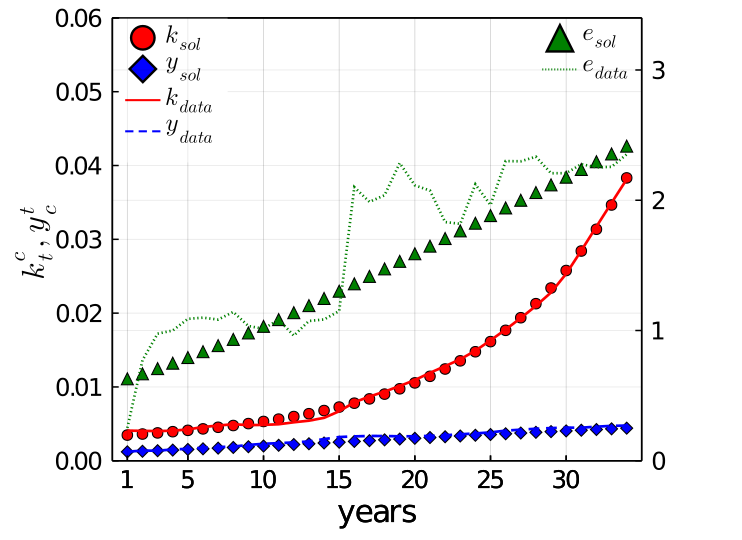

In [18]:
function plot_graphmodel1(nnpred,country,nntstepsfull,kdata,ydata,edata)
        upscale = 0.9 #8x upscaling in resolution
    fntsm = Plots.font("sans-serif", pointsize=round(12.0*upscale))
    fntlg = Plots.font("sans-serif", pointsize=round(16.0*upscale))
    default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
    default(size=(550*upscale,400*upscale)) #Plot canvas size
    default(dpi=150)
    
#     fctime = collect(Int(floor(size(nntstepsfull,1)*0.8))+1:1:size(nntstepsfull,1)) 
#             println(fctime)
#             println(nntstepsfull)
    plotkyenn12ic= scatter(xaxis=nntstepsfull,nnpred[:,1:2],
        label=[L"k_{sol}" L"y_{sol}"],color=[:red :blue],legend=(0.102,0.955),
        markershape=[:circle :diamond],markersize=4,
        ylabel=L"k^c_t,y^t_c",right_margin = 15Plots.mm)
            
    plot!(plotkyenn12ic,[kdata,ydata],label=[L"k_{data}" L"y_{data}"],linestyle=[:solid :dash],
        color=[:red :blue],ylim=(0,1.5.*round(maximum(kdata);sigdigits=1)),foreground_color_legend = nothing)

#     scatter!(plotkyenn12ic,fctime,nnpred[1:2,fctime]',
#         color=[:red :blue],markershape=[:circle :diamond], markersize=4,label=nothing) #markersize = 8 for predict

    pr = twinx()
    
    scatter!(pr,nntstepsfull,nnpred[:,3],label=L"e_{sol}",
        color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4, right_margin = 15Plots.mm,
        foreground_color_legend = nothing,background_color_legend = nothing)

# #     scatter!(pr,fctime,nnpred[3,fctime],
# #         label=L"e_{sol}",color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4,
# #         ylabel=L"e^t_c",right_margin = 15Plots.mm,
# #         foreground_color_legend = nothing,background_color_legend = nothing)
            
    plot!(pr,edata,label=L"e_{data}",color=:green,ylim=(0,1.7.*round(maximum(edata);sigdigits=1)),
                linestyle=:dot)
    
    xpts = collect(0:5:5*ceil(length(nntstepsfull)/5))
#     if xpts[end] != length(nntsteps)
#         push!(xpts,length(nntsteps))
        xpts[1]=1
#     end
    
   plot(plotkyenn12ic,xlabel = "years",xticks=xpts,box=:on,linewidth=2*upscale)
#     display(StatsPlots.plot(pl,xlabel = "Days post 21 March 2020",xticks=0:10:110,tickfont=12,
#         guidefont = 16,legendfontsize=12,legend=(0.1,0.92),
#         dpi=300,box=:on,linewidth=2*upscale))
# file_dir1 = @__DIR__
#     savefig(string(file_dir1,"/",country,"model1_maxdata"))
end

plot_graphmodel1(pred,"Botswana",range(1, 34, length = 34),kdata,ydata,edata)